In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt


%matplotlib inline

full_result_season = pd.read_csv('./data/DataFiles/RegularSeasonDetailedResults.csv')

#import team IDs
team_ids = pd.read_csv('./data/DataFiles/Teams.csv')

submit_sample = pd.read_csv('./data/SampleTourney2018/SampleSubmissionStage2_SampleTourney2018.csv')

data_2018 = pd.read_csv('./data/Stage2UpdatedDataFiles/RegularSeasonDetailedResults.csv')

In [2]:
full_result_season = data_2018

In [3]:
full_result_season.columns

Index([u'Season', u'DayNum', u'WTeamID', u'WScore', u'LTeamID', u'LScore',
       u'WLoc', u'NumOT', u'WFGM', u'WFGA', u'WFGM3', u'WFGA3', u'WFTM',
       u'WFTA', u'WOR', u'WDR', u'WAst', u'WTO', u'WStl', u'WBlk', u'WPF',
       u'LFGM', u'LFGA', u'LFGM3', u'LFGA3', u'LFTM', u'LFTA', u'LOR', u'LDR',
       u'LAst', u'LTO', u'LStl', u'LBlk', u'LPF'],
      dtype='object')

In [4]:
named_test = pd.merge(full_result_season, team_ids[['TeamID', 'TeamName']], left_on='WTeamID', right_on='TeamID')

In [5]:
named_test.columns = [u'Season', u'DayNum', u'WTeamID', u'WScore', u'LTeamID', u'LScore',
       u'WLoc', u'NumOT', u'WFGM', u'WFGA', u'WFGM3', u'WFGA3', u'WFTM',
       u'WFTA', u'WOR', u'WDR', u'WAst', u'WTO', u'WStl', u'WBlk', u'WPF',
       u'LFGM', u'LFGA', u'LFGM3', u'LFGA3', u'LFTM', u'LFTA', u'LOR', u'LDR',
       u'LAst', u'LTO', u'LStl', u'LBlk', u'LPF', u'TeamID', u'WTeamName']

named_test = named_test.drop('TeamID', axis=1)

In [6]:
named_test = pd.merge(named_test, team_ids[['TeamID', 'TeamName']], left_on='LTeamID', right_on='TeamID')

In [7]:
named_test.columns = [u'Season',    u'DayNum',   u'WTeamID',    u'WScore',   u'LTeamID',
          u'LScore',      u'WLoc',     u'NumOT',      u'WFGM',      u'WFGA',
           u'WFGM3',     u'WFGA3',      u'WFTM',      u'WFTA',       u'WOR',
             u'WDR',      u'WAst',       u'WTO',      u'WStl',      u'WBlk',
             u'WPF',      u'LFGM',      u'LFGA',     u'LFGM3',     u'LFGA3',
            u'LFTM',      u'LFTA',       u'LOR',       u'LDR',      u'LAst',
             u'LTO',      u'LStl',      u'LBlk',       u'LPF', u'WTeamName',
          u'TeamID',  u'LTeamName']
named_test = named_test.drop('TeamID', axis=1)

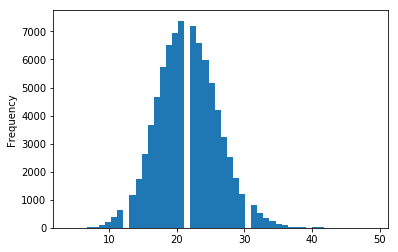

In [8]:
named_test['LDR'].plot.hist(bins = 50)

Aggregate averages per season

In [9]:
#Calculator Function for Stats

def point_stats(win_team_seas, loss_team_seas):

    #Points
    ppg_seas = (win_team_seas['WScore'].mean()*len_win + loss_team_seas['LScore'].mean()*len_loss)/(len_win+len_loss) 
    ppga_seas = (win_team_seas['LScore'].mean()*len_win + loss_team_seas['WScore'].mean()*len_loss)/(len_win+len_loss)

    return ppg_seas, ppga_seas
        
def rebound_stats(win_team_seas, loss_team_seas):
    # Rebounds - Defensive and Offensive
    #Defensive
    drb_seas = (win_team_seas['WDR'].mean()*len_win + loss_team_seas['LDR'].mean()*len_loss)/(len_win+len_loss)
    drba_seas = (win_team_seas['LDR'].mean()*len_win + loss_team_seas['WDR'].mean()*len_loss)/(len_win+len_loss)
    #Offensive
    orb_seas = (win_team_seas['WOR'].mean()*len_win + loss_team_seas['LOR'].mean()*len_loss)/(len_win+len_loss)
    orba_seas = (win_team_seas['LOR'].mean()*len_win + loss_team_seas['WOR'].mean()*len_loss)/(len_win+len_loss)

    return drb_seas, drba_seas, orb_seas, orba_seas
        
        
def shooting_stats(win_team_seas, loss_team_seas):
    ###Shooting Percentages
    # FG Percent
    fg_percent = (((win_team_seas['WFGM']/win_team_seas['WFGA'])*len_win).mean() 
                  + ((loss_team_seas['LFGM']/loss_team_seas['LFGA'])*len_win).mean())/(len_win+len_loss)
    # FG Percent Allowed
    fg_percent_allow = (((win_team_seas['LFGM']/win_team_seas['LFGA'])*len_win).mean() 
                  + ((loss_team_seas['WFGM']/loss_team_seas['WFGA'])*len_win).mean())/(len_win+len_loss)

    # FG 3 Pointer Percent
    fg3_percent = (((win_team_seas['WFGM3']/win_team_seas['WFGA3'])*len_win).mean() 
                  + ((loss_team_seas['LFGM3']/loss_team_seas['LFGA3'])*len_win).mean())/(len_win+len_loss)
    # FG 3 Pointer Percent Allowed
    fg3_percent_allow = (((win_team_seas['LFGM3']/win_team_seas['LFGA3'])*len_win).mean() 
                  + ((loss_team_seas['WFGM3']/loss_team_seas['WFGA3'])*len_win).mean())/(len_win+len_loss)

    #FT Percentage
    ft_percent = (((win_team_seas['WFTM']/win_team_seas['WFTA'])*len_win).mean() 
                  + ((loss_team_seas['LFTM']/loss_team_seas['LFTA'])*len_win).mean())/(len_win+len_loss)

    #FT Percentage Opponent
    ft_percent_opp = (((win_team_seas['LFTM']/win_team_seas['LFTA'])*len_win).mean() 
                  + ((loss_team_seas['WFTM']/loss_team_seas['WFTA'])*len_win).mean())/(len_win+len_loss)

    return fg_percent, fg_percent_allow, fg3_percent, fg3_percent_allow, ft_percent, ft_percent_opp

    
def assist_stats(win_team_seas, loss_team_seas):
    ###Supplementary Stats
    #Assists
    ast_seas = (win_team_seas['WAst'].mean()*len_win + loss_team_seas['LAst'].mean()*len_loss)/(len_win+len_loss) 
    asta_seas = (win_team_seas['LAst'].mean()*len_win + loss_team_seas['WAst'].mean()*len_loss)/(len_win+len_loss)

    return ast_seas, asta_seas

def turnover_stats(win_team_seas, loss_team_seas):
    #Turnovers
    to_seas = (win_team_seas['WTO'].mean()*len_win + loss_team_seas['LTO'].mean()*len_loss)/(len_win+len_loss) 
    tof_seas = (win_team_seas['LTO'].mean()*len_win + loss_team_seas['WTO'].mean()*len_loss)/(len_win+len_loss)

    return to_seas, tof_seas

def steals_stats(win_team_seas, loss_team_seas):
    #Steals
    stl_seas = (win_team_seas['WStl'].mean()*len_win + loss_team_seas['LStl'].mean()*len_loss)/(len_win+len_loss) 
    stla_seas = (win_team_seas['LStl'].mean()*len_win + loss_team_seas['WStl'].mean()*len_loss)/(len_win+len_loss)

    return stl_seas, stla_seas


def block_stats(win_team_seas, loss_team_seas):       
    #Blocks
    block_seas = (win_team_seas['WBlk'].mean()*len_win + loss_team_seas['LBlk'].mean()*len_loss)/(len_win+len_loss) 
    blocka_seas = (win_team_seas['LBlk'].mean()*len_win + loss_team_seas['WBlk'].mean()*len_loss)/(len_win+len_loss)

    return block_seas, blocka_seas
        
def foul_stats(win_team_seas, loss_team_seas):
    #Personal Fouls
    pf_seas = (win_team_seas['WPF'].mean()*len_win + loss_team_seas['LPF'].mean()*len_loss)/(len_win+len_loss) 
    pfr_seas = (win_team_seas['LPF'].mean()*len_win + loss_team_seas['WPF'].mean()*len_loss)/(len_win+len_loss)
    
    return pf_seas, pfr_seas
        
        
        
            

In [10]:
#General Process
# 1 - Loops through WTeamIDS
# 2 - Loop through Seasons
# 3 - Calculate the desired averages
# 4 - Store in Master List

master_list = []
header = ['TeamID', 'TeamName', 'Season', 'Number Wins', 'Number Losses', 'PPG', 'PPGA', 'DRB', 'DRB Allowed', 'ORB',
          'ORB Allowed', 'FG Percent', 'FG Percent Allowed', '3 Point Percent', '3 Point Percent Alllowed', 'FT Percent',
          'FT Opponent','Assists', 'Assists Allowed' ,'Turnovers', 'Turnovers Forced', 'Steals', 'Steals Allowed', 
          'Blocks', 'Blocks Allowed', 'Personal Fouls', 'Personal Fouls Received']

#find unique teamids
unique_team_id = team_ids['TeamID'].unique()
unique_season = named_test['Season'].unique()

#Loop Through TeamIDs
for ids in unique_team_id:
    
    win_team = named_test[named_test['WTeamID']==ids]
    loss_team = named_test[named_test['LTeamID']==ids]
    
    if win_team.empty==False:
    
        team_name = win_team['WTeamName'].iloc[0]

        for seas in unique_season:
            win_team_seas = win_team[win_team['Season']==seas]
            loss_team_seas = loss_team[loss_team['Season']==seas]

            len_win = len(win_team_seas)
            len_loss = len(loss_team_seas)

            if (len_win + len_loss) != 0:

                #Call calculator functions
                #points
                ppg, ppga = point_stats(win_team_seas, loss_team_seas)
                #rebounds
                drb_seas, drba_seas, orb_seas, orba_seas = rebound_stats(win_team_seas, loss_team_seas)
                #shooting
                fg_percent, fg_percent_allow, fg3_percent, fg3_percent_allow, ft_percent, ft_percent_opp = shooting_stats(win_team_seas, loss_team_seas)
                #Assists
                ast_seas, asta_seas = assist_stats(win_team_seas, loss_team_seas)
                #Turnovers
                to_seas, tof_seas = turnover_stats(win_team_seas, loss_team_seas)
                #steals
                stl_seas, stla_seas = steals_stats(win_team_seas, loss_team_seas)
                #blocks
                block_seas, blocka_seas = block_stats(win_team_seas, loss_team_seas)
                #fouls
                pf_seas, pfr_seas = foul_stats(win_team_seas, loss_team_seas)

            else:
                ppg = 0.0
                ppga = 0.0
                drb_seas = 0.0
                drba_seas = 0.0
                orb_seas = 0.0
                orba_seas = 0.0
                fg_percent = 0.0
                fg_percent_allow = 0.0
                fg3_percent = 0.0
                fg3_percent_allow = 0.0
                ft_percent = 0.0
                ft_percent_opp = 0.0
                ast_seas = 0.0
                asta_seas = 0.0
                to_seas = 0.0
                tof_seas = 0.0
                stl_seas = 0.0
                stla_seas = 0.0
                block_seas = 0.0
                blocka_seas = 0.0
                pf_seas = 0.0
                pfr_seas = 0.0


            #storage tuple
            stor = [ids, team_name, seas, len_win, len_loss, ppg, ppga, drb_seas, drba_seas, orb_seas, orba_seas,
                   fg_percent, fg_percent_allow, fg3_percent, fg3_percent_allow, ft_percent, ft_percent_opp, 
                   ast_seas, asta_seas, to_seas, tof_seas, stl_seas, stla_seas, block_seas, blocka_seas, pf_seas, pfr_seas]
            master_list.append(stor)
            
            
            
            
            

In [11]:
df1 = pd.DataFrame(master_list, columns = header)

In [12]:
duke = df1[df1['TeamName'] == 'Duke']
duke = duke.sort_values(by =['Season'])

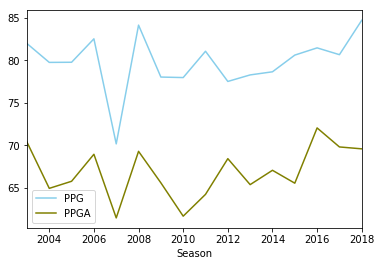

In [13]:
duke.plot(x ='Season', y = ['PPG', 'PPGA'], color = ['skyblue', 'olive'])

In [14]:
duke = duke.sort_values(by =['Season'])

Manipulate data table to perform XG Boost

function to get wins

In [15]:
def get_team1_win(row):
    if row['WTeamID'] < row['LTeamID']:
        return 1
    else:
        return 0

In [16]:
full_result_season['Team1_win'] = full_result_season[['Season', 'WTeamID', 'LTeamID']].apply(get_team1_win, axis=1)

In [17]:
full_result_season['Team1'] = full_result_season[['WTeamID', 'LTeamID']].min(axis=1)
full_result_season['Team2'] = full_result_season[['WTeamID', 'LTeamID']].max(axis=1)

Create new data frame for season stats

In [18]:
season_stats = full_result_season[['Season', 'Team1', 'Team2', 'Team1_win']]
#Merge the desired team id and wins for Team 1
season_stats = pd.merge(season_stats, df1, left_on=['Season', 'Team1'], right_on=['Season', 'TeamID'], how='left')
del season_stats['TeamID']
#Merge the desired team id and wins for Team 2
season_stats = pd.merge(season_stats, df1, left_on=['Season', 'Team2'], right_on=['Season', 'TeamID'], how='left', suffixes=['_1', '_2'])
del season_stats['TeamID']

In [19]:
season_stats.columns

Index([u'Season', u'Team1', u'Team2', u'Team1_win', u'TeamName_1',
       u'Number Wins_1', u'Number Losses_1', u'PPG_1', u'PPGA_1', u'DRB_1',
       u'DRB Allowed_1', u'ORB_1', u'ORB Allowed_1', u'FG Percent_1',
       u'FG Percent Allowed_1', u'3 Point Percent_1',
       u'3 Point Percent Alllowed_1', u'FT Percent_1', u'FT Opponent_1',
       u'Assists_1', u'Assists Allowed_1', u'Turnovers_1',
       u'Turnovers Forced_1', u'Steals_1', u'Steals Allowed_1', u'Blocks_1',
       u'Blocks Allowed_1', u'Personal Fouls_1', u'Personal Fouls Received_1',
       u'TeamName_2', u'Number Wins_2', u'Number Losses_2', u'PPG_2',
       u'PPGA_2', u'DRB_2', u'DRB Allowed_2', u'ORB_2', u'ORB Allowed_2',
       u'FG Percent_2', u'FG Percent Allowed_2', u'3 Point Percent_2',
       u'3 Point Percent Alllowed_2', u'FT Percent_2', u'FT Opponent_2',
       u'Assists_2', u'Assists Allowed_2', u'Turnovers_2',
       u'Turnovers Forced_2', u'Steals_2', u'Steals Allowed_2', u'Blocks_2',
       u'Blocks Allow

Start the modeling process

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import xgboost as xgb

Define the datasets

In [21]:
no_reg_cols = ['Team1_win', 'TeamName_1', 'TeamName_2', 'Season', 'Team1', 'Team2' , 'Number Losses_1', 'Number Losses_2',\
              'PPGA_1', 'PPGA_2']

train, val = train_test_split(season_stats, test_size=.2)

regressors = [col for col in train.columns if (col not in no_reg_cols)] #and ('Allowed' not in col) and ('Forced' not in col) and ('Received' not in col) and ('Opponent' not in col) and (('Alllowed' not in col))]
print('Features to be used in training: ', regressors)

X_train = train[regressors]
y_train = train['Team1_win']

X_val = val[regressors]
y_val = val['Team1_win']


('Features to be used in training: ', ['Number Wins_1', 'PPG_1', 'DRB_1', 'DRB Allowed_1', 'ORB_1', 'ORB Allowed_1', 'FG Percent_1', 'FG Percent Allowed_1', '3 Point Percent_1', '3 Point Percent Alllowed_1', 'FT Percent_1', 'FT Opponent_1', 'Assists_1', 'Assists Allowed_1', 'Turnovers_1', 'Turnovers Forced_1', 'Steals_1', 'Steals Allowed_1', 'Blocks_1', 'Blocks Allowed_1', 'Personal Fouls_1', 'Personal Fouls Received_1', 'Number Wins_2', 'PPG_2', 'DRB_2', 'DRB Allowed_2', 'ORB_2', 'ORB Allowed_2', 'FG Percent_2', 'FG Percent Allowed_2', '3 Point Percent_2', '3 Point Percent Alllowed_2', 'FT Percent_2', 'FT Opponent_2', 'Assists_2', 'Assists Allowed_2', 'Turnovers_2', 'Turnovers Forced_2', 'Steals_2', 'Steals Allowed_2', 'Blocks_2', 'Blocks Allowed_2', 'Personal Fouls_2', 'Personal Fouls Received_2'])


Deal with the missing data

In [22]:
X_train = X_train.fillna(X_train.mean())
#X_train = X_train.fillna(0)
X_train = X_train.values

X_val = X_val.fillna(X_val.mean())
#X_val = X_val.fillna(0)
X_val = X_val.values

Run the xgboost model

In [23]:
d_train = xgb.DMatrix(X_train, label=y_train)
d_val = xgb.DMatrix(X_val, label=y_val)

print(X_train.shape)
print(X_val.shape)

(65632, 44)
(16409, 44)


In [24]:
params = {
    'max_depth':8,
    'min_child_weight': 50,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    'objective':'binary:logistic',
    'eval_metric':'logloss'
}

# With more time, a more rigorous grid search for parameters would get better results
model = xgb.train(
    params,
    d_train,
    num_boost_round=999,
    evals=[(d_val, "Val")],
    early_stopping_rounds=10
)

Will train until Val error hasn't decreased in 10 rounds.
[0]	Val-logloss:0.615920
[1]	Val-logloss:0.575794
[2]	Val-logloss:0.552926
[3]	Val-logloss:0.539798
[4]	Val-logloss:0.531885
[5]	Val-logloss:0.527716
[6]	Val-logloss:0.525453
[7]	Val-logloss:0.524155
[8]	Val-logloss:0.523634
[9]	Val-logloss:0.523347
[10]	Val-logloss:0.523388
[11]	Val-logloss:0.524006
[12]	Val-logloss:0.524676
[13]	Val-logloss:0.525110
[14]	Val-logloss:0.525191
[15]	Val-logloss:0.525684
[16]	Val-logloss:0.526139
[17]	Val-logloss:0.526733
[18]	Val-logloss:0.526998
[19]	Val-logloss:0.527167
Stopping. Best iteration:
[9]	Val-logloss:0.523347



In [25]:
y_pred = model.predict(d_val)
val['win_pred_prob'] = y_pred

/Users/Santiago/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


See weights of regressors

In [26]:
model.feature_names = regressors
pd.Series(model.get_fscore()).sort_values(ascending=False)

f22    106
f0      91
f40     69
f36     69
f18     62
f14     53
f2      44
f6      43
f11     42
f3      41
f12     40
f33     38
f43     35
f41     35
f30     35
f20     35
f32     35
f25     34
f28     34
f34     34
f31     33
f42     33
f4      33
f13     32
f26     32
f5      31
f19     31
f9      31
f29     31
f15     30
f10     29
f16     28
f38     27
f23     27
f17     27
f24     26
f1      26
f35     25
f8      24
f39     24
f37     23
f27     22
f21     20
f7      15
dtype: int64

In [27]:
regressors[18]

'Blocks_1'

In [28]:
def get_season_team_12(row):
    return row['ID'].split('_')

In [29]:
result_df = submit_sample

In [30]:
result_df['Season'] = result_df.apply(lambda x : int(get_season_team_12(x)[0]), axis=1)
result_df['Team1'] = result_df.apply(lambda x : int(get_season_team_12(x)[1]), axis=1)
result_df['Team2'] = result_df.apply(lambda x : int(get_season_team_12(x)[2]), axis=1)
del result_df['ID']
del result_df['Pred']

In [31]:
result_df = pd.merge(result_df, df1, left_on=['Season', 'Team1'], right_on=['Season', 'TeamID'])
del result_df['TeamID']

In [32]:
result_df = pd.merge(result_df, df1, left_on=['Season', 'Team2'], right_on=['Season', 'TeamID'], how='left', suffixes=['_1', '_2'])
del result_df['TeamID']

In [33]:
X_result = result_df[regressors].values
d_result = xgb.DMatrix(X_result)

In [34]:
result_pred = model.predict(d_result)
result_df['pred'] = result_pred

In [35]:
result_pred_df = result_df

In [36]:
submit_sample['Pred'] = result_pred

In [37]:
submit_sample2 = pd.read_csv('./data/SampleTourney2018/SampleSubmissionStage2_SampleTourney2018.csv')

In [38]:
submit_sample2['Pred'] = result_pred

In [39]:
submit_sample2.to_csv('Predictions_Stage2.csv', index=False)